# **Lab 7**

In [ ]:
name = "Muhammad Haziq Faiz Bin Mohd Ripin"
sid  = "1201302740"

## Exploratory Data Analysis (EDA)

In this lab, you will learn how to explore the data further by statistical and correlation analysis. Many functions are available in Python (and other packages) to help you achieve this at ease. You will also learn how  how to explore data from ground-up. Of course, exploratory analysis also entails utilizing graphical representations to provide meaningful "pictorial" description of the data.

> **Credit note:** A portion of this lab was adapted from [sanithps98's repo](https://github.com/sanithps98/Automobile-Dataset-Analysis) on data analysis.

In [1]:
import numpy as np
import pandas as pd

from IPython.display import display

To visualize data, let's load the relevant packages. We have two packages that we can use:

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

## Describing the Data

We will be using the cleaned car data that we did in Lab 4.

In [5]:
df = pd.read_csv('car_data_CLEANED.csv', index_col=0)   # first column is used as index

# for those interested to see all columns and rows of the dataframe, uncomment the following:
#
#pd.options.display.max_columns = None
#pd.options.display.max_rows = None

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower-binned
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,Low
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,Low
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,Medium
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,Low
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,Low


The most basic function that you can use to describe the data with summary statistics is to use `describe()`.

In [6]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,0.836373,0.911588,0.898409,2555.565854,126.907317,3.329751,3.255423,10.142537,104.253659,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,31.681008,6.021776,0.059285,0.029671,0.040862,520.680204,41.642693,0.270844,0.313597,3.972040,39.519219,476.979093,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,0.678039,0.834025,0.799331,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,0.799135,0.886584,0.869565,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.000000,97.000000,0.832292,0.905947,0.904682,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,137.000000,102.400000,0.879865,0.925311,0.928094,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
horsepower-binned     object
dtype: object

Notice that all the attributes that are of `object` type (mainly strings, or other non-numerical types) are ignored when we use `describe()`.

Interestingly, you can also "describe" the non-numerical data. This is how: Fix the "include" option to 'object' (the data type), and it now gives a set of relevant measures: **count** (how many values), **unique** (how many unique values), **top** (the one with the most values), **freq** (the count of the most frequent value). 

In [8]:
df.describe(include=['object'])

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,205,205,205,205,205,205,205,205,205,205,205
unique,22,2,2,2,5,3,2,7,7,8,3
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,185,168,116,96,120,202,148,159,94,163


We can now see that most cars are of "Low" horsepower category (163 of them), and most cars are sedan type (96 of them).

**Descriptive Question 1**: What are the average prices for each category of car body styles?

To obtain the unique types of car body styles, use `unique()` on the column `body-style`:

In [9]:
df['body-style'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

**Q1**: Find the average prices for each of these categories.

*Recall: You could use* `groupby` *function here to group the data by the body styles, and have each group calculate its mean.*

In [10]:
# write your code here
df2 = df.groupby("body-style").mean()
df2[["price"]]

,price
body-style,
convertible,21890.500000
hardtop,22208.500000
hatchback,9957.441176
sedan,14459.755319
wagon,12371.960000


### Crosstabs / Pivot Tables

Crosstabs and pivot tables are kind of similar at first glance. They allow us to analyze data that can be aggregated by more than a single attribute. Both retain data in tabular format but in a more summarized form. Generally, they are only different in terms of their functionalities in certain softwares (read [here](https://www.mtab.com/difference-crosstabs-pivot-tables/) for more information) where pivot tables are normally regarded as more dynamic (users can drag and drop and rearrange data on the spot) than crosstabs.

If you are planning to perform grouping of data with multiple variables (say, grouping by drive type and body style), you might do something like this:

In [11]:
df_gp1 = df[['drive-wheels','body-style','price']]
gp1 = df_gp1.groupby(['drive-wheels','body-style'],as_index=False).mean()
gp1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


Basically, all possible combinations of the drive type and body style, have been aggregated by mean. It may be much easier to visualize if it is made into a pivot table instead:

In [12]:
gp_pivot = gp1.pivot(index='drive-wheels',columns='body-style',values="price")
gp_pivot

body-style,convertible,hardtop,hatchback,sedan,wagon
drive-wheels,,,,,
4wd,NaN,NaN,7603.000000,12647.333333,9095.750000
fwd,11595.0,8249.000000,8396.387755,9811.800000,9997.333333
rwd,23949.6,24202.714286,14337.777778,21711.833333,16994.222222


In [13]:
gp_pt = gp1.pivot_table(index='drive-wheels',columns='body-style',values="price", aggfunc=np.mean)
gp_pt

body-style,convertible,hardtop,hatchback,sedan,wagon
drive-wheels,,,,,
4wd,NaN,NaN,7603.000000,12647.333333,9095.750000
fwd,11595.0,8249.000000,8396.387755,9811.800000,9997.333333
rwd,23949.6,24202.714286,14337.777778,21711.833333,16994.222222


Often, we do not have data for some of the pivot cells (because that combination just didn't exist). We can fill these missing cells with the value 0, or you can be also satisfied with leaving it as NaN if no further processing is going to happen.

### Dispersion

**Exploratory Question 2**: What is the dispersion of the price of cars in this data? 

A boxplot is a good graphical representation to show dispersion, particularly for continuous numerical values such as prices.

In [14]:
df_price = df[["price"]]
df_price

,price
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0
...,...
200,16845.0
201,19045.0
202,21485.0
203,22470.0


There are some rows with NaN. We should drop them.

In [15]:
df_price.dropna(inplace=True)
df_price

/home/haziq/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,price
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0
...,...
200,16845.0
201,19045.0
202,21485.0
203,22470.0


We use Seaborn package's [`boxplot`](https://seaborn.pydata.org/generated/seaborn.boxplot.html). Check out the documentation to see other options for customization.

<AxesSubplot:ylabel='price'>

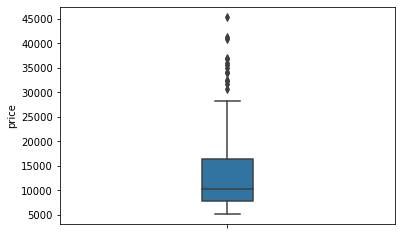

In [16]:
sns.boxplot(y="price", width=0.15, data=df_price)    

Multiple boxplots can be shown together if we define more than one "dimensions" to it. Seaborn makes it really simple: you just need to define what is along the 'x' and 'y'.

<AxesSubplot:xlabel='body-style', ylabel='price'>

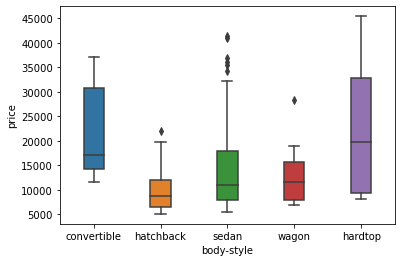

In [17]:
sns.boxplot(x="body-style", y="price", width=0.3, data=df)

We see that the distributions of price between the different body-style categories have a significant overlap (especially hatchback, sedan and wagon styles), so we could probably "guess" that there is not that much correlation between these two attributes, hence the body-style attribute may not be a good predictor of price as well (if we intend to train a model using this attribute).

But this is not a good way to look at correlation between attributes. The better way is to calculate correlation itself.

### Correlation

**Exploratory Question 3**: What are a few attributes that correlate the most with the car price?

Pandas is really convenient. You can immediately compute the correlation between attributes by using the `corr()` function, without needing to worry about the NaN values interfering

> Technical note: If you have NaN values you cannot calculate the correlation score. If you use Numpy's `corrcoef` function, you have to manually handle them).

In [18]:
df_esp = df[["engine-size", "price"]]

In [19]:
df_esp.corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


This is a matrix containing the correlation coefficients ([Pearson's](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) by default) between pairs of attributes. It is also symmetrical because order of attribute is not important when computing correlation (correlation between x and y is the same as correlation between y and x). 

Why do you think the diagonal values are 1?

Do you think engine size correlates positively with price?

You can pass this matrix into Seaborn's heatmap function, which provides some colors and shading to give a graphical representation to correlation. 

<AxesSubplot:>

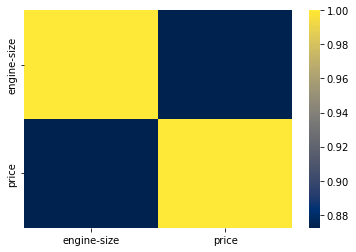

In [20]:
sns.heatmap(df_esp.corr(), cmap='cividis')   #cividis is a colormap setting. You can change it to other options

Let's try for the entire dataframe (numerical data only):

<AxesSubplot:>

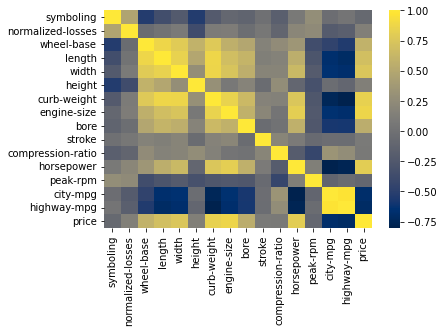

In [21]:
sns.heatmap(df.corr(), cmap='cividis')

**Q2**: Which of the following numerical attributes correlate strongly with car price?

<br><br>

These attributes are the ones that make good candidates as features for subsequent data mining or machine learning tasks. They are able to tell apart a car that has a high or low price.

According to https://link.springer.com/article/10.1057/jt.2009.5 a good positive correlation value is 0.7 and above

In [22]:
df_corr = df.corr()[["price"]]

df_corr[(df_corr["price"]>0.7) & (df_corr.index!="price")]

,price
width,0.751265
curb-weight,0.834415
engine-size,0.872335
horsepower,0.809607


### Scatter Plot

The correlation between two attributes can be better visualized in a scatter plot of data points. Here is Seaborn's [`scatterplot`](https://seaborn.pydata.org/generated/seaborn.scatterplot.html).

<AxesSubplot:xlabel='engine-size', ylabel='price'>

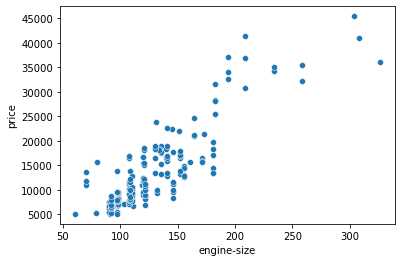

In [23]:
sns.scatterplot(x="engine-size", y="price", data=df)

Seaborn has another function [`regplot`](https://seaborn.pydata.org/generated/seaborn.regplot.html) which plots the scatter plot plus the fitted regression line. 

> At this point, we have not covered the topic of Regression, but you can think of this line as one that characterises the distribution of the data in a linear way. In correlation terms, it gives us an idea whether the correlation is positive or negative, strong or weak, or there is no correlation between the attributes.

(0.0, 53332.48407934249)

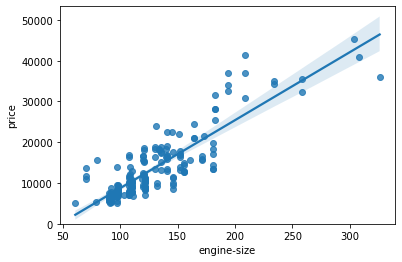

In [24]:
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

As the size of engine goes up, the price seems to goes up as well: this indicates a positive direct correlation between these two variables. The regression line is almost a perfect diagonal line, which means that the correlation between these two attributes is pretty strong. In predictive modeling, we can also think of this as, if we have information of a car's engine size, we are likely to be able to predict (regress) the price quite well. 
<br><br>

**Q3**: Visualize the scatter plots of several other variables listed below, versus the price.
* highway-mpg
* peak-rpm
* stroke

Analyse the scatter plots and also determine their correlation scores to see if they match your analysis: 

(0.0, 48159.01230393957)

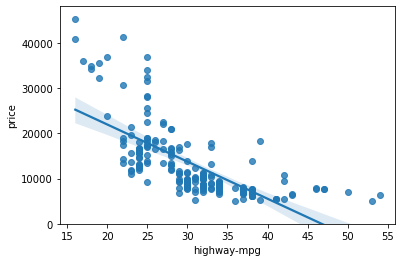

In [25]:
# price vs highway-mpg
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)



(0.0, 47414.1)

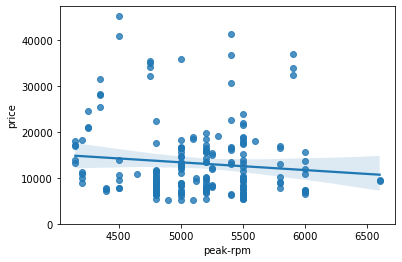

In [26]:
# price vs peak-rpm
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

(0.0, 47414.1)

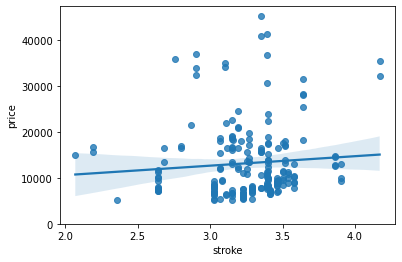

In [27]:
# price vs stroke
sns.regplot(x="stroke", y="price", data=df)
plt.ylim(0,)

[Matplotlib](https://matplotlib.org/) package will be explored in more detail when we come to Data Visualization topic later. For now, Seaborn seems to be quite straightforward and easy to use but you may not be able to have fine control over how the plot comes out. (Note: Actually you can, but you need some knowledge on how to manipulate plots with matplotlib. Seaborn has matplotlib running beneath.)

## DIY: Try it on another dataset

Go to World Bank Indicators open data: https://data.worldbank.org/indicator. 
Find the data (CSV will do) for Life Expectancy at Birth, and GDP Per Capita. They are separate datasets (in zipped files). Perform merging so that you have one tabular data containing both attributes. Once you are familiar with doing this at ease, you can find more attributes to merge. 

Some interesting suggestions for your consideration: CO2 emissions, Government expenditure on education, Inflation, Mobile cellular subscription.

In [28]:
# read the GDP Per Capita and skip the first 4 rows
gdp = pd.read_csv('API_NY.GDP.PCAP.CD_DS2_en_csv_v2_3632113.csv', skiprows=3)
gdp

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,24712.493263,26441.619936,26893.011506,28396.908423,28452.170615,29350.805019,30253.279358,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,147.612227,147.014904,156.189192,182.243917,162.347592,180.214908,...,1736.166560,1713.899299,1703.596298,1549.037940,1431.778723,1573.063386,1574.978648,1530.059177,1359.618224,NaN
2,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,59.773234,59.860900,58.458009,78.706429,82.095307,101.108325,...,638.845852,624.315455,614.223342,556.007221,512.012778,516.679862,485.668419,494.179350,516.747871,NaN
3,Africa Western and Central,AFW,GDP per capita (current US$),NY.GDP.PCAP.CD,107.932233,113.081647,118.831107,123.442888,131.854402,138.526332,...,1965.118485,2157.481149,2212.853135,1894.310195,1673.835527,1613.473553,1704.139603,1777.918672,1710.073363,NaN
4,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,5100.097027,5254.881126,5408.411700,4166.979833,3506.073128,4095.810057,3289.643995,2809.626088,1776.166868,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3410.859780,3704.784221,3902.676013,3520.766449,3759.560246,4009.380987,4384.048892,4416.108358,4346.637931,NaN
262,"Yemen, Rep.",YEM,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1446.536472,1607.152173,1674.002572,1601.830063,1152.720966,964.264811,758.145242,NaN,NaN,NaN
263,South Africa,ZAF,GDP per capita (current US$),NY.GDP.PCAP.CD,443.009920,454.962013,473.011405,511.497364,548.996058,584.704163,...,8222.197279,7467.079185,6988.808739,6259.839681,5756.965741,6690.939847,7005.095413,6624.761865,5655.867654,NaN
264,Zambia,ZMB,GDP per capita (current US$),NY.GDP.PCAP.CD,232.188564,220.042067,212.578449,213.896759,242.384473,303.281740,...,1763.069442,1878.346811,1762.427817,1338.290927,1280.806543,1535.196574,1516.368371,1305.001031,985.132436,NaN


In [20]:
#read the Life Expectancy at Birth csv and skip the first 4 rows
life_expectancy = pd.read_csv("API_SP.DYN.LE00.IN_DS2_en_csv_v2_3630764.csv",skiprows=3)
life_expectancy.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,65.662000,66.074000,66.444000,66.787000,67.113000,67.435000,...,75.299000,75.441000,75.583000,75.725000,75.868000,76.010000,76.152000,76.293000,NaN,NaN
1,Africa Eastern and Southern,AFE,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,42.716053,43.166935,43.603990,44.025617,44.432721,44.826919,...,60.185561,60.953363,61.647367,62.259288,62.787681,63.246264,63.648988,64.005197,NaN,NaN
2,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.446000,32.962000,33.471000,33.971000,34.463000,34.948000,...,62.054000,62.525000,62.966000,63.377000,63.763000,64.130000,64.486000,64.833000,NaN,NaN
3,Africa Western and Central,AFW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,37.205380,37.632546,38.052612,38.463746,38.867073,39.264841,...,55.138944,55.618986,56.088269,56.542009,56.974761,57.382363,57.762347,58.115723,NaN,NaN
4,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,37.524000,37.811000,38.113000,38.430000,38.760000,39.102000,...,57.236000,58.054000,58.776000,59.398000,59.925000,60.379000,60.782000,61.147000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,70.743902,70.943902,71.243902,71.495122,71.743902,71.995122,72.243902,72.495122,NaN,NaN
262,"Yemen, Rep.",YEM,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,29.919000,30.163000,30.500000,30.943000,31.501000,32.175000,...,65.920000,66.016000,66.066000,66.085000,66.087000,66.086000,66.096000,66.125000,NaN,NaN
263,South Africa,ZAF,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,48.406000,48.777000,49.142000,49.509000,49.888000,50.284000,...,60.060000,61.099000,61.968000,62.649000,63.153000,63.538000,63.857000,64.131000,NaN,NaN
264,Zambia,ZMB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,46.687000,47.084000,47.446000,47.772000,48.068000,48.351000,...,58.502000,59.746000,60.831000,61.737000,62.464000,63.043000,63.510000,63.886000,NaN,NaN


In [27]:
combined_list = [gdp,life_expectancy]
combined_df = pd.concat(combined_list)
combined_df = combined_df.sort_values(by="Country Code")
combined_df.to_csv('combined_gdp_lifeexpectancy.csv', index=False)
combined_df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,24712.493263,26441.619936,26893.011506,28396.908423,28452.170615,29350.805019,30253.279358,NaN,NaN,NaN
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,65.662000,66.074000,66.444000,66.787000,67.113000,67.435000,...,75.299000,75.441000,75.583000,75.725000,75.868000,76.010000,76.152000,76.293000,NaN,NaN
1,Africa Eastern and Southern,AFE,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,42.716053,43.166935,43.603990,44.025617,44.432721,44.826919,...,60.185561,60.953363,61.647367,62.259288,62.787681,63.246264,63.648988,64.005197,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,147.612227,147.014904,156.189192,182.243917,162.347592,180.214908,...,1736.166560,1713.899299,1703.596298,1549.037940,1431.778723,1573.063386,1574.978648,1530.059177,1359.618224,NaN
2,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.446000,32.962000,33.471000,33.971000,34.463000,34.948000,...,62.054000,62.525000,62.966000,63.377000,63.763000,64.130000,64.486000,64.833000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,South Africa,ZAF,GDP per capita (current US$),NY.GDP.PCAP.CD,443.009920,454.962013,473.011405,511.497364,548.996058,584.704163,...,8222.197279,7467.079185,6988.808739,6259.839681,5756.965741,6690.939847,7005.095413,6624.761865,5655.867654,NaN
264,Zambia,ZMB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,46.687000,47.084000,47.446000,47.772000,48.068000,48.351000,...,58.502000,59.746000,60.831000,61.737000,62.464000,63.043000,63.510000,63.886000,NaN,NaN
264,Zambia,ZMB,GDP per capita (current US$),NY.GDP.PCAP.CD,232.188564,220.042067,212.578449,213.896759,242.384473,303.281740,...,1763.069442,1878.346811,1762.427817,1338.290927,1280.806543,1535.196574,1516.368371,1305.001031,985.132436,NaN
265,Zimbabwe,ZWE,GDP per capita (current US$),NY.GDP.PCAP.CD,278.813847,280.828663,276.688233,277.479715,281.558896,293.308788,...,1304.968011,1429.998461,1434.896277,1445.069702,1464.588957,1235.189032,1254.642265,1316.740657,1214.509820,NaN
